In [ ]:
# Grasp Quality Detection - Vibration-Based

# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Set style
sns.set_theme(style="whitegrid")

# 2. Load the Dataset
file_path = r"C:\Users\MR X\Desktop\dataset\shadow_robot_dataset.csv" 
df = pd.read_csv(file_path)

# 3. Clean Column Names
df.columns = df.columns.str.strip()

# 4. Convert 'robustness' to binary label
# Rule: if robustness > 100 → stable (1), else unstable (0)
df['label'] = (df['robustness'] > 100).astype(int)

# 5. Drop unused columns
df = df.drop(columns=['experiment_number', 'measurement_number', 'robustness'])

# 6. Define features (X) and target (y)
X = df.drop(columns=['label'])
y = df['label']

# 7. Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Count occurrences of each label
label_counts = df['label'].value_counts()
labels = label_counts.index.astype(str)
sizes = label_counts.values

# Define custom colors if you want
colors = ["#fd0000", "#004bee"] if len(sizes) == 2 else plt.cm.tab20.colors

# Create the donut chart
fig, ax = plt.subplots(figsize=(8, 6))
wedges, texts, autotexts = ax.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    textprops={'color': 'white'},
    wedgeprops={'linewidth': 12, 'edgecolor': 'black'}
)

# Donut hole
centre_circle = plt.Circle((0, 0), 0.70, fc='black')
fig.gca().add_artist(centre_circle)

# Title
plt.title("Dataset Label Distribution:Grasp Classification", fontsize=18, fontweight='bold')
plt.tight_layout()
plt.show()


✅ Confusion Matrix:
[[103981   5073]
 [  1316  88159]]

✅ Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.95      0.97    109054
           1       0.95      0.99      0.97     89475

    accuracy                           0.97    198529
   macro avg       0.97      0.97      0.97    198529
weighted avg       0.97      0.97      0.97    198529



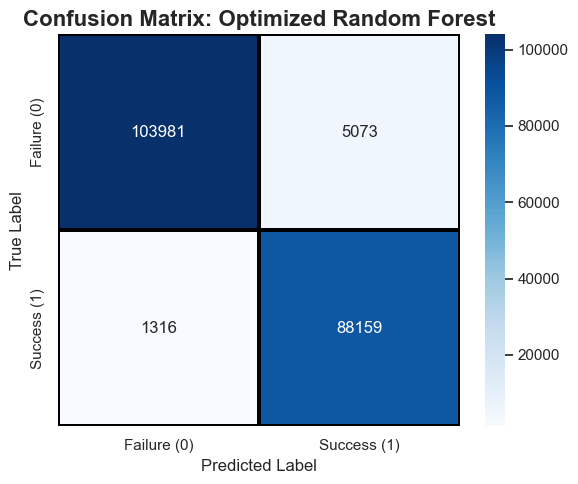

In [5]:

# 8. Train Random Forest Classifier
model = RandomForestClassifier(n_estimators=100,random_state=45, n_jobs=-1)
model.fit(X_train, y_train)

# 9. Predict on test set
y_pred = model.predict(X_test)

# 10. Evaluation
cm = confusion_matrix(y_test, y_pred)
print("✅ Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\n✅ Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix Heatmap
labels = ['Failure (0)', 'Success (1)']
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels,
            linewidths=1.5, linecolor='black')

plt.title("Confusion Matrix: Optimized Random Forest", fontsize=16, fontweight='bold')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.savefig("confusion_matrix_heatmap.png", dpi=300)
plt.show()

Fitting 3 folds for each of 8 candidates, totalling 24 fits
✅ Best Parameters: {'class_weight': 'balanced', 'max_depth': None, 'n_estimators': 100}
✅ Best Cross-Validated Score: 0.9586179279497099

✅ Confusion Matrix:
 [[104096   4958]
 [  1386  88089]]

✅ Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.95      0.97    109054
           1       0.95      0.98      0.97     89475

    accuracy                           0.97    198529
   macro avg       0.97      0.97      0.97    198529
weighted avg       0.97      0.97      0.97    198529



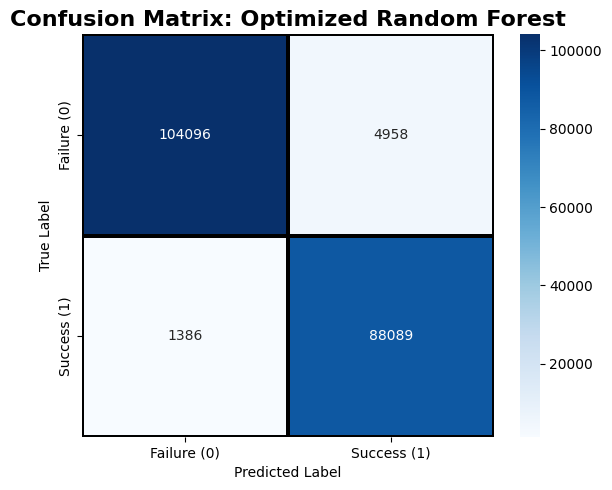

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Smaller Grid — Much Faster!
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10],
    'class_weight': [None, 'balanced']
}

# Base model with full CPU usage
rf = RandomForestClassifier(random_state=45, n_jobs=-1)

# Grid Search (2 × 2 × 2 = 8 combinations × 3 CV = 24 models)
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=3,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2
)

# Fit
grid_search.fit(X_train, y_train)

# Best model
best_model = grid_search.best_estimator_
print("✅ Best Parameters:", grid_search.best_params_)
print("✅ Best Cross-Validated Score:", grid_search.best_score_)

# Predict & Evaluate
y_pred = best_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print("\n✅ Confusion Matrix:\n", cm)
print("\n✅ Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix Heatmap
labels = ['Failure (0)', 'Success (1)']
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels,
            linewidths=1.5, linecolor='black')

plt.title("Confusion Matrix: Optimized Random Forest", fontsize=16, fontweight='bold')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.savefig("confusion_matrix_heatmap.png", dpi=300)
plt.show()


In [6]:
# Additional imports for SVM
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# 1. Standardize features and build SVM pipeline
svm_pipeline = make_pipeline(
    StandardScaler(),
    LinearSVC(random_state=42, max_iter=10000)
)

# 2. Fit the SVM on training data
print("Training SVM model...")
svm_pipeline.fit(X_train, y_train)

# 3. Predict
y_pred = svm_pipeline.predict(X_test)

# 4. Evaluation
print("\n✅ Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\n✅ Classification Report:")
print(classification_report(y_test, y_pred))


Training SVM model...

✅ Confusion Matrix:
[[72562 36492]
 [ 6764 82711]]

✅ Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.67      0.77    109054
           1       0.69      0.92      0.79     89475

    accuracy                           0.78    198529
   macro avg       0.80      0.79      0.78    198529
weighted avg       0.82      0.78      0.78    198529

